In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
file_path = "/content/drive/MyDrive/messy_data.csv"
if os.path.exists(file_path):
  print("file exists")
else:
  print("file does not exist")

file exists


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/messy_data.csv')

In [ ]:
### VIEWING THE DATA
df.head(12)

,Medication_ID,Medication_Name,Batch_Number,Stock_Quantity,Reorder_Level,Expiration_Date,Supplier,Unit_Price,Last_Restock_Date
0,101,Paracetamol,A123,50.0,20,2025-07-15,XYZ Pharma,$5.00,2024-01-10
1,102,Ibuprofen,B234,20.0,15,2024-04-20,ABC Ltd,$10.50,2023-12-15
2,103,Amoxicillin,C345,0.0,10,2023-12-10,XYZ Pharma,$8.75,2023-06-25
3,104,Metformin,D456,75.0,30,2026-01-30,MediCorp,$6.25,2024-02-01
4,105,Losartan,E567,5.0,10,2024-06-18,MediCorp,$12.00,2023-11-30
5,106,Atorvastatin,F678,NaN,40,NaN,HealthPlus,$7.80,Unknown
6,107,Omeprazole,G789,200.0,100,2025-11-05,NaN,NaN,2023-09-10
7,108,Salbutamol,H890,100.0,50,2025-02-28,ABC Ltd,$9.00,2024-01-05
8,109,Cetirizine,I901,0.0,5,Expired,XYZ Pharma,$11.50,2023-10-20
9,110,Insulin,J012,30.0,25,2026-09-15,MediCorp,$4.50,2024-02-12


In [ ]:
### find missing values
df.isnull().sum()

,0
Medication_ID,0
Medication_Name,0
Batch_Number,0
Stock_Quantity,1
Reorder_Level,0
Expiration_Date,1
Supplier,1
Unit_Price,1
Last_Restock_Date,0


In [ ]:
### filling missing values
df["Stock_Quantity"] = df["Stock_Quantity"].fillna(0)
df["Expiration_Date"] = df["Expiration_Date"].fillna("Not Available")
df["Supplier"] = df["Supplier"].fillna("Medexpress Pharmacy")
df["Unit_Price"] = df["Unit_Price"].fillna(500)

In [ ]:
df

,Medication_ID,Medication_Name,Batch_Number,Stock_Quantity,Reorder_Level,Expiration_Date,Supplier,Unit_Price,Last_Restock_Date
0,101,Paracetamol,A123,50.0,20,2025-07-15,XYZ Pharma,$5.00,2024-01-10
1,102,Ibuprofen,B234,20.0,15,2024-04-20,ABC Ltd,$10.50,2023-12-15
2,103,Amoxicillin,C345,0.0,10,2023-12-10,XYZ Pharma,$8.75,2023-06-25
3,104,Metformin,D456,75.0,30,2026-01-30,MediCorp,$6.25,2024-02-01
4,105,Losartan,E567,5.0,10,2024-06-18,MediCorp,$12.00,2023-11-30
5,106,Atorvastatin,F678,0.0,40,Not Available,HealthPlus,$7.80,Unknown
6,107,Omeprazole,G789,200.0,100,2025-11-05,Medexpress Pharmacy,500,2023-09-10
7,108,Salbutamol,H890,100.0,50,2025-02-28,ABC Ltd,$9.00,2024-01-05
8,109,Cetirizine,I901,0.0,5,Expired,XYZ Pharma,$11.50,2023-10-20
9,110,Insulin,J012,30.0,25,2026-09-15,MediCorp,$4.50,2024-02-12


In [ ]:
### checking for hidden figures
for col in df.columns:
  print(repr(col))

'Medication_ID'
'Medication_Name'
'Batch_Number'
'Stock_Quantity'
'Reorder_Level'
'Expiration_Date'
'Supplier'
'Unit_Price'
'Last_Restock_Date'


In [ ]:
### cchecking for duplicate
df.duplicated().sum()

np.int64(0)

In [ ]:
### frequently restoked : how many times a medication appeared
df["Medication_Name"].value_counts()


,count
Medication_Name,
Paracetamol,1
Ibuprofen,1
Amoxicillin,1
Metformin,1
Losartan,1
Atorvastatin,1
Omeprazole,1
Salbutamol,1
Cetirizine,1


In [ ]:
df["Medication_Name"].nunique()

10

In [ ]:
####  medication with the highest stock quantity
df[["Medication_Name", "Stock_Quantity"]].sort_values(by= "Stock_Quantity", ascending=False)

,Medication_Name,Stock_Quantity
6,Omeprazole,200.0
7,Salbutamol,100.0
3,Metformin,75.0
0,Paracetamol,50.0
9,Insulin,30.0
1,Ibuprofen,20.0
4,Losartan,5.0
2,Amoxicillin,0.0
5,Atorvastatin,0.0
8,Cetirizine,0.0


In [ ]:
### stock level insight
out_of_stock = df[df["Stock_Quantity"]== 0]
low_stock = df[df["Stock_Quantity"] < 20]
well_stocked = df[df["Stock_Quantity"] > 20]
print("-"* 50)
print("out of stock medication:\n", out_of_stock.to_string(index=False))
print("-"* 50)

print("low stock medication:\n", low_stock.to_string(index=False))
print("-"* 50)
print("well stocked medication:\n", well_stocked.to_string(index=False))
print("-"* 50)

--------------------------------------------------
out of stock medication:
  Medication_ID Medication_Name Batch_Number  Stock_Quantity  Reorder_Level Expiration_Date   Supplier Unit_Price Last_Restock_Date
           103     Amoxicillin         C345             0.0             10      2023-12-10 XYZ Pharma      $8.75        2023-06-25
           106    Atorvastatin         F678             0.0             40   Not Available HealthPlus      $7.80           Unknown
           109      Cetirizine         I901             0.0              5         Expired XYZ Pharma     $11.50        2023-10-20
--------------------------------------------------
low stock medication:
  Medication_ID Medication_Name Batch_Number  Stock_Quantity  Reorder_Level Expiration_Date   Supplier Unit_Price Last_Restock_Date
           103     Amoxicillin         C345             0.0             10      2023-12-10 XYZ Pharma      $8.75        2023-06-25
           105        Losartan         E567             5.0    

In [ ]:
### creating the visualization

In [ ]:
!pip install matplotlib seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-18-ea326429299c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Medication_Name"],y=df["Stock_Quantity"], palette= 'viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

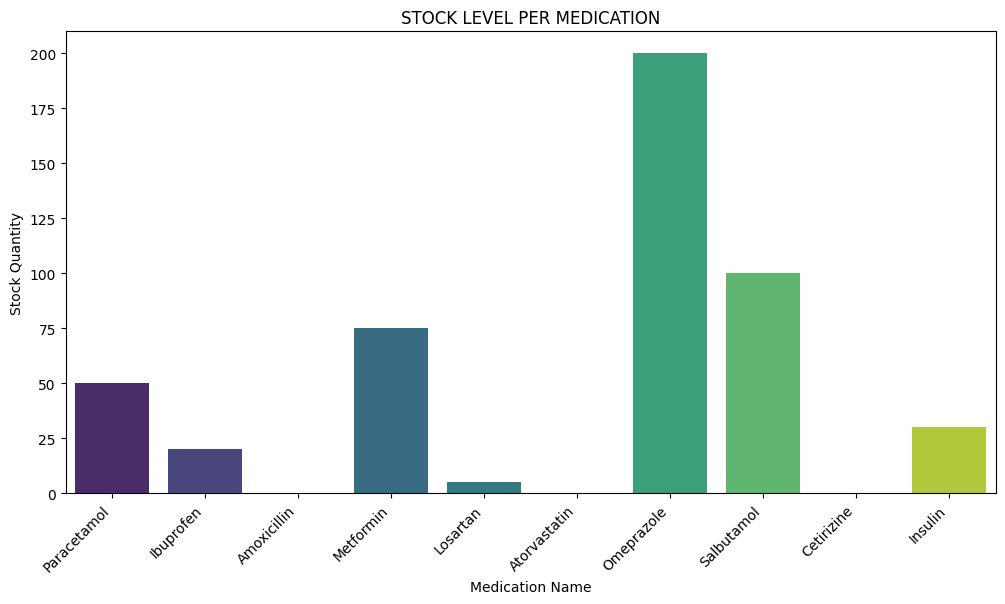

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df["Medication_Name"],y=df["Stock_Quantity"], palette= 'viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Medication Name')
plt.ylabel('Stock Quantity')
plt.title('STOCK LEVEL PER MEDICATION')
plt.savefig("/content/drive/MyDrive/Stock_Level_Per_Medication_chart.png")
plt.show

In [ ]:
### STOCK STATUS BREAK DOWN PIE CHART

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
## define stock based on quantity
def categorize_stock(quantity):
  if quantity < 20:
    return "low stock"
  elif 20 <= quantity <= 50:
    return "sufficient stock"
  else:
    return "over stocked"


In [ ]:
df["Stock_Status"] = df["Stock_Quantity"].apply(categorize_stock)
status_count = df["Stock_Status"].value_counts()

<function matplotlib.pyplot.show(close=None, block=None)>

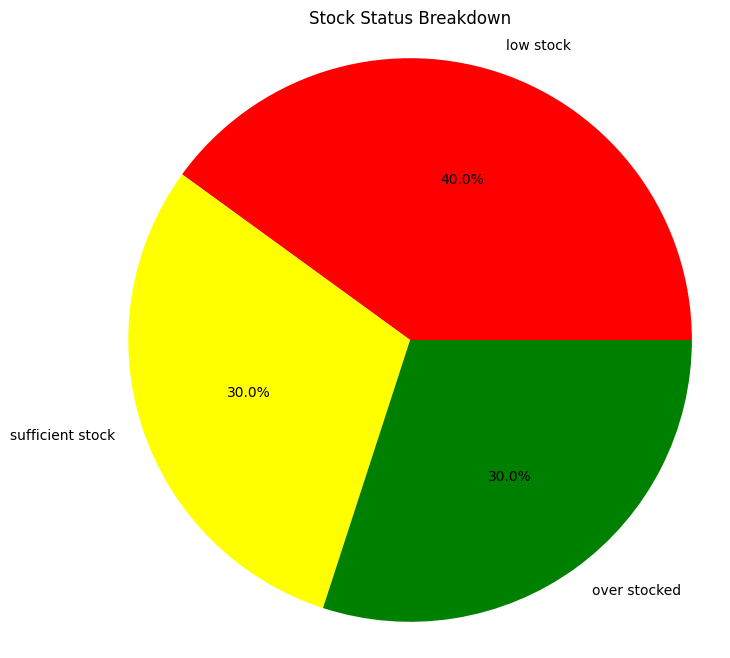

In [ ]:
### plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_count, labels=status_count.index, autopct='%1.1f%%',colors=["red", "yellow", "green"])
plt.title('Stock Status Breakdown')
plt.axis('equal')
plt.savefig("/content/drive/MyDrive/Stock_Status_chart.png")
plt.show


In [ ]:
### re order prority

In [ ]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

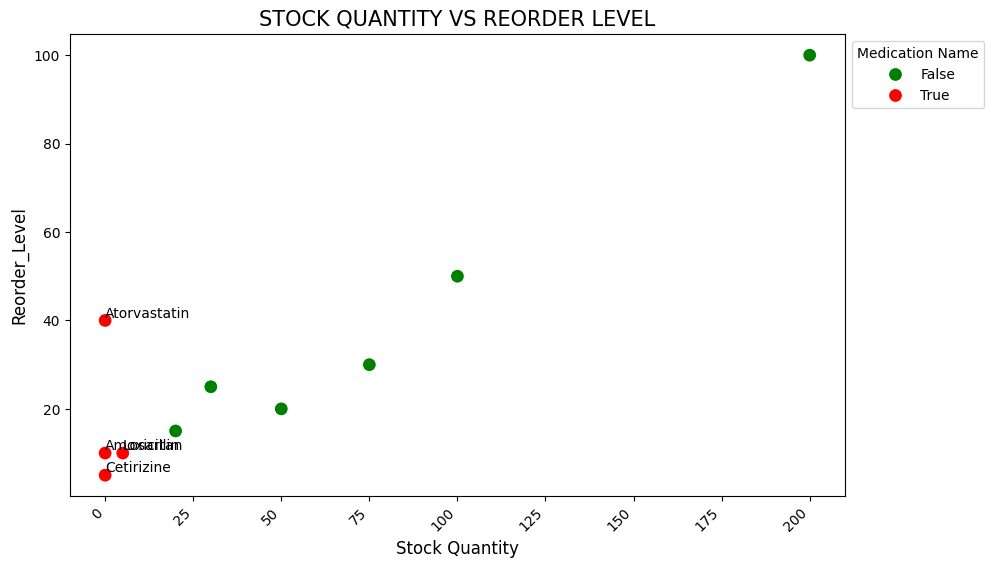

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df["Stock_Quantity"],y=df["Reorder_Level"], hue= df["Reorder_Level"] > df["Stock_Quantity"], palette= {True: "red", False: "green"}, s=100)
for i in range(len(df)):
  if df["Stock_Quantity"][i] <= df["Reorder_Level"][i]:
    plt.text(df["Stock_Quantity"][i], df["Reorder_Level"][i], df["Medication_Name"][i], fontsize=10, verticalalignment="bottom")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Stock Quantity', fontsize=12)
plt.ylabel("Reorder_Level", fontsize=12)
plt.title('STOCK QUANTITY VS REORDER LEVEL', fontsize=15)
plt.legend(title= "Medication Name",  bbox_to_anchor=(1,1))
plt.savefig("/content/drive/MyDrive/Stock_Quantity_chart.png")
plt.show

In [ ]:
from google.colab import files
df.to_csv('cleaned_data.csv', index=False)
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>